data file: CSV containing the customers for whom loan eligibility is known as 'Loan_Status'

Loan_ID - Unique Loan ID

Gender - Male/ Female

Married - Applicant married (Y/N)

Dependents - Number of dependents

Education - Applicant Education (Graduate/ Under Graduate)

Self_Employed - Self employed (Y/N)

ApplicantIncome - Applicant income

CoapplicantIncome - Coapplicant income

LoanAmount - Loan amount in thousands

Loan_Amount_Term - Term of loan in months

Credit_History - credit history meets guidelines

Property_Area - Urban/ Semi Urban/ Rural

Loan_Status - (Target) Loan approved (Y/N)

##Importing Libraries

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

###Importing the data and Looking at the Dataset

In [59]:
Loan_train=pd.read_csv('/content/data_file.csv')
Loan_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


###Shape of the Dataset

In [8]:
print('Number of Rows in the Data',Loan_train.shape[0])
print('Number of Columns in the Data',Loan_train.shape[1])

Number of Rows in the Data 614
Number of Columns in the Data 13


In [9]:
Loan_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We observe there are Null values in the Data.
Credit_History and Loan_Amount_Term are Categorical varible we need to change its Data type.
Loan_Status is the Target Variables.
We can drop the Loan_ID Column as it does not provide any information.

##Checking for duplicate values

In [10]:
dups=Loan_train.duplicated()
print('Number of duplicate records',dups.sum())

Number of duplicate records 0


In [13]:
Loan_train['Credit_History']=Loan_train['Credit_History'].astype('object')
Loan_train['Loan_Amount_Term']=Loan_train['Loan_Amount_Term'].astype('object')

In [15]:
Loan_train['Dependents']=np.where(Loan_train['Dependents']=='0',0,Loan_train['Dependents'])
Loan_train['Dependents']=np.where(Loan_train['Dependents']=='1',1,Loan_train['Dependents'])
Loan_train['Dependents']=np.where(Loan_train['Dependents']=='2',2,Loan_train['Dependents'])
Loan_train['Dependents']=np.where(Loan_train['Dependents']=='3+',3,Loan_train['Dependents'])

In [16]:
Loan_train['Dependents']=Loan_train['Dependents'].astype('float64')

##Separating object and numeric data

In [19]:
cat=[]
num=[]
for i in Loan_train.columns:
    if Loan_train[i].dtype=='object':
        cat.append(i)
    else:
        num.append(i)

print(cat)
print(num)

['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']
['Dependents', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']


In [20]:
#Looking at unique values
for i in Loan_train[cat]:
    print(i)
    print( Loan_train[i].value_counts())
    print('**********************************')

Gender
Male      489
Female    112
Name: Gender, dtype: int64
**********************************
Married
Yes    398
No     213
Name: Married, dtype: int64
**********************************
Education
Graduate        480
Not Graduate    134
Name: Education, dtype: int64
**********************************
Self_Employed
No     500
Yes     82
Name: Self_Employed, dtype: int64
**********************************
Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64
**********************************
Credit_History
1.0    475
0.0     89
Name: Credit_History, dtype: int64
**********************************
Property_Area
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64
**********************************
Loan_Status
Y    422
N    192
Name: Loan_Status, dtype: int64
**********************************


##Summary of the Numeric Data

In [21]:
Loan_train[num].describe().T

,count,mean,std,min,25%,50%,75%,max
Dependents,599.0,0.762938,1.015216,0.0,0.0,0.0,2.00,3.0
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0


we observe that there is high standard deviation i.e there is a lot of variance in the Dataset.
some Records are missing in LoanAmount and Loan_Amount_Term columns
Maximum Loan Amount applied for is 700 thousand


In [22]:
Loan_train[cat].describe().T

,count,unique,top,freq
Gender,601,2,Male,489
Married,611,2,Yes,398
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Loan_Amount_Term,600,10,360,512
Credit_History,564,2,1,475
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


#####Most Applicants are Male
#####Most applicant are Married
#####Most Applicants have no dependents
#####Most Applicants are not Self Employed
#####Most Applicants are from Semi urban
#####Most of the Loans have been Approved
#####Minimum Term of loan in months is 12 and Maximum is 480 months.

###Checking for null values

In [23]:
Loan_train[num].isnull().sum()

Dependents           15
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
dtype: int64

In [24]:
Loan_train[cat].isnull().sum()

Gender              13
Married              3
Education            0
Self_Employed       32
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
dtype: int64

###We observe that there are Null values in the Dataset
###Updating the values in  Tagret Variable

In [25]:
Loan_train['Loan_Status']=np.where(Loan_train['Loan_Status']=='Y',1,Loan_train['Loan_Status'])
Loan_train['Loan_Status']=np.where(Loan_train['Loan_Status']=='N',0,Loan_train['Loan_Status'])
Loan_train['Loan_Status']=Loan_train['Loan_Status'].astype('int64')

##Looking at the distribution of the Dataset

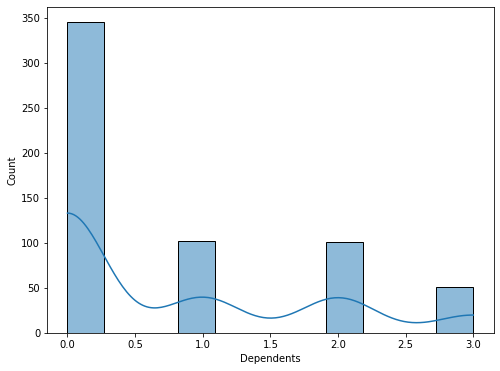

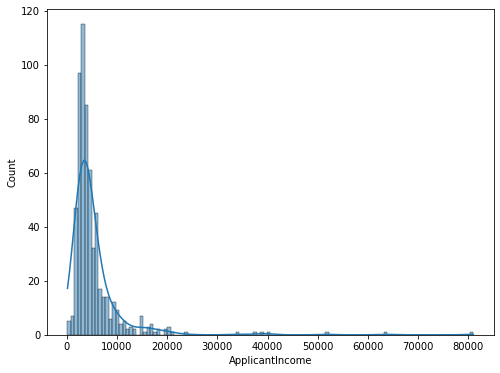

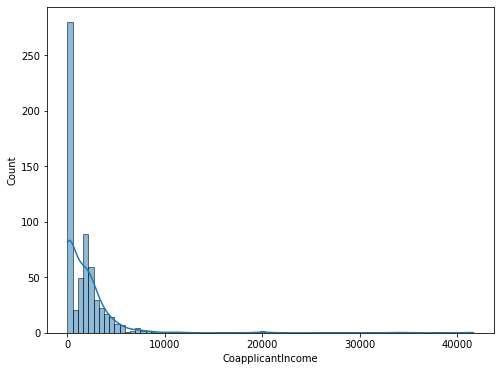

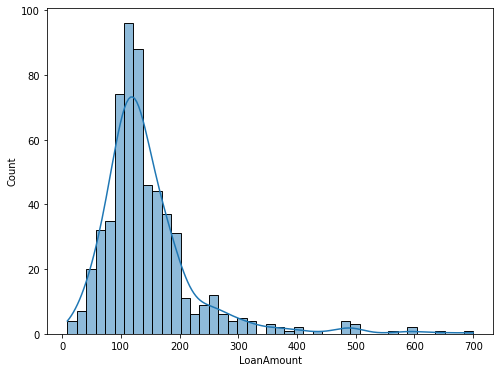

In [26]:
for i in Loan_train[num]:
    plt.figure(figsize=(8,6))
    sns.histplot(Loan_train[i],kde=True)

We observe that the numeric Columns are highly Skewed towards right

##Univariate Analysis

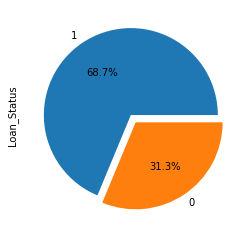

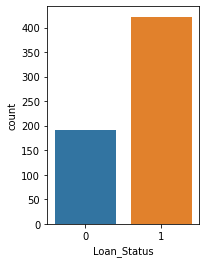

In [27]:
plt.subplot(1,1,1)
Loan_train['Loan_Status'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()
plt.subplot(1,2,2)
sns.countplot(Loan_train['Loan_Status'])
plt.show()

#68.7% of the Loans get approved while 31.3% get rejected

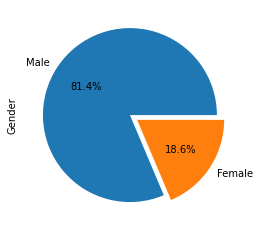

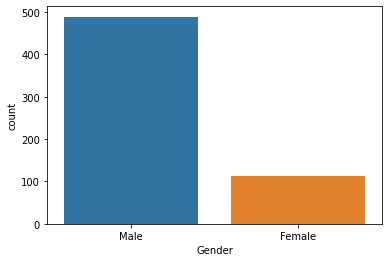

In [28]:
Loan_train['Gender'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()
sns.countplot(Loan_train['Gender'])
plt.show()

#81.4% of the applicants are Male

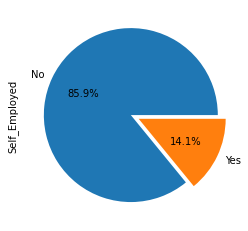

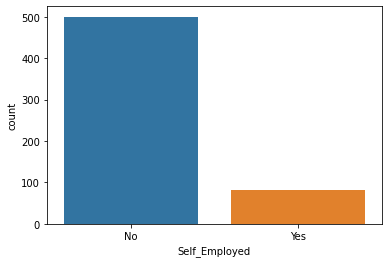

In [29]:
Loan_train['Self_Employed'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()
sns.countplot(Loan_train['Self_Employed'])
plt.show()

#85.9% of the applicants are Self_Employed

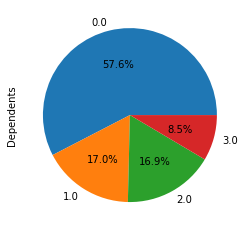

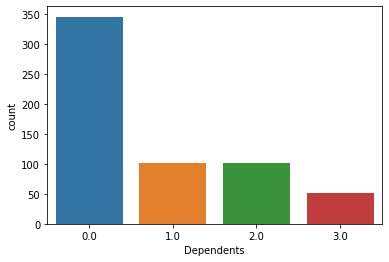

In [30]:
Loan_train['Dependents'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()
sns.countplot(Loan_train['Dependents'])
plt.show()

# 57.6% of the Applicants have no dependents
# Most Applicant have no Dependents

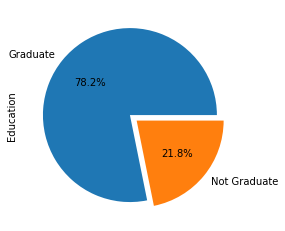

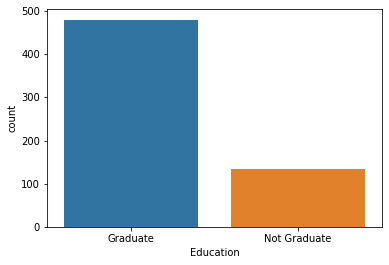

In [31]:
Loan_train['Education'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()
sns.countplot(Loan_train['Education'])

#78.2% of the Applicants are Graduates

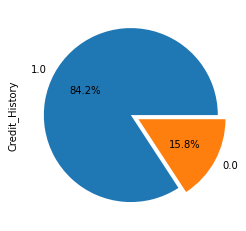

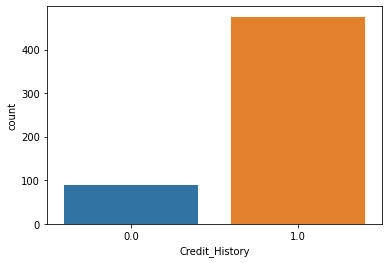

In [32]:
Loan_train['Credit_History'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%')
plt.show()
sns.countplot(Loan_train['Credit_History'])
plt.show()

#84.2% of the Applicants have very good Credit Score

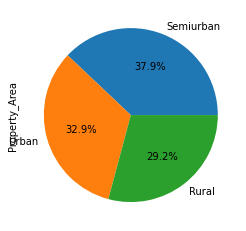

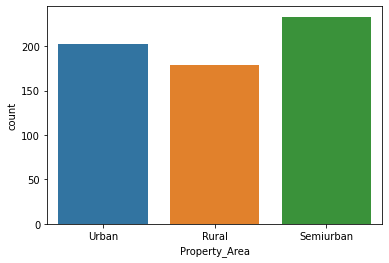

In [33]:
Loan_train['Property_Area'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()
sns.countplot(Loan_train['Property_Area'])
plt.show()

# Most Applicants are from Urban  or Semiurban Area

#Bivariate Analysis
##Looking at the aproval rate for gender

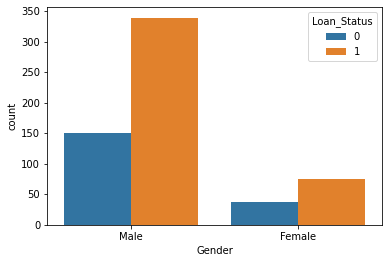

In [34]:
sns.countplot(Loan_train['Gender'],hue=Loan_train['Loan_Status'])
plt.show()

In [35]:
pd.crosstab(Loan_train['Gender'],Loan_train['Loan_Status'],margins=True)

Loan_Status,0,1,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [ ]:
print('Approaval rate of Loans of Male Applicants',np.round(339/489,2))
print('Approaval rate of Loans of Female Applicants',np.round(75/112,2))

#Although Female Applicants are much less, does not mean that their Loans are less likely to be approved.

Looking at the aproval rate with Respect to Marital Status


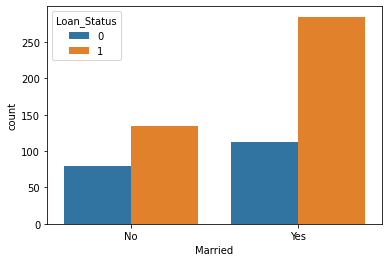

Loan_Status,0,1,All
Married,,,
No,79,134,213
Yes,113,285,398
All,192,419,611


In [37]:
sns.countplot(Loan_train['Married'],hue=Loan_train['Loan_Status'])
plt.show()
pd.crosstab(Loan_train['Married'],Loan_train['Loan_Status'],margins=True)

In [39]:
print('Approaval rate of Loans of Married Applicants',np.round(285/398,2))
print('Approaval rate of Loans of Non-Married Applicants',np.round(134/213,2))

Approaval rate of Loans of Married Applicants 0.72
Approaval rate of Loans of Non-Married Applicants 0.63


#Loans of Married Applicants are more likely to be approved

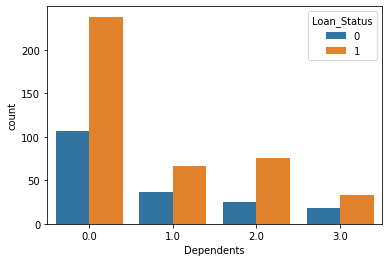

Loan_Status,0,1,All
Dependents,,,
0.0,0.178631,0.397329,0.575960
1.0,0.060100,0.110184,0.170284
2.0,0.041736,0.126878,0.168614
3.0,0.030050,0.055092,0.085142
All,0.310518,0.689482,1.000000


In [40]:
sns.countplot(Loan_train['Dependents'],hue=Loan_train['Loan_Status'])
plt.show()
pd.crosstab(Loan_train['Dependents'],Loan_train['Loan_Status'],margins=True,normalize=True)

#Applicants with 0 Dependents have more chances of Loan Approval, while 3+ Dependents have very low chances

##Looking at the aproval rate with Respect to Education

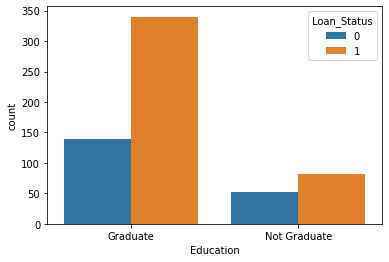

Loan_Status,0,1,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


In [42]:
sns.countplot(Loan_train['Education'],hue=Loan_train['Loan_Status'])
plt.show()
pd.crosstab(Loan_train['Education'],Loan_train['Loan_Status'],margins=True)


In [43]:
print('Approaval rate of Loans of Graduate Applicants',np.round(340/480,2))
print('Approaval rate of Loans of Not Graduate Applicants',np.round(82/134,2))

Approaval rate of Loans of Graduate Applicants 0.71
Approaval rate of Loans of Not Graduate Applicants 0.61


##Looking at the aproval rate with Respect to Credit Score


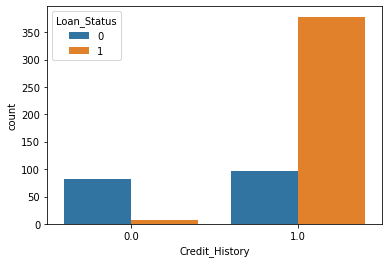

Loan_Status,0,1,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [44]:
sns.countplot(Loan_train['Credit_History'],hue=Loan_train['Loan_Status'])
plt.show()
pd.crosstab(Loan_train['Credit_History'],Loan_train['Loan_Status'],margins=True)

In [45]:
print('Approaval rate of Loans for Applicants who do not have credit history meets guidelines',np.round(7/89,2))
print('Approaval rate of Loans for Applicants who have credit history meets guidelines',np.round(378/475,2))

Approaval rate of Loans for Applicants who do not have credit history meets guidelines 0.08
Approaval rate of Loans for Applicants who have credit history meets guidelines 0.8


###As we Expect Applicants with good credit History have more chances of Loan Approval while for Applicants with Poor Credit History there is almost no individual.

##Looking at the aproval rate with Respect to Property Area

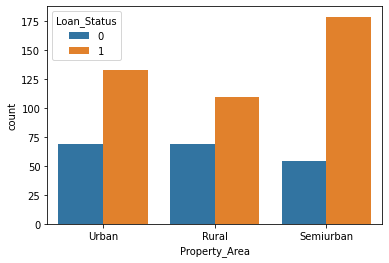

Loan_Status,0,1,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [46]:
sns.countplot(Loan_train['Property_Area'],hue=Loan_train['Loan_Status'])
plt.show()
pd.crosstab(Loan_train['Property_Area'],Loan_train['Loan_Status'],margins=True)

In [47]:
print('Approaval rate of Loans for Applicants from Rural Area',np.round(110/179,2))
print('Approaval rate of Loans for Applicants from Semiurban Area',np.round(179/233,2))
print('Approaval rate of Loans for Applicants from Urban Area',np.round(133/202,2))

Approaval rate of Loans for Applicants from Rural Area 0.61
Approaval rate of Loans for Applicants from Semiurban Area 0.77
Approaval rate of Loans for Applicants from Urban Area 0.66


###Applicants from Semiurban Area have more chances of Loan Approval while for Applicants from Rural area have least.

##Looking at the aproval rate with Respect to Applicant Income.

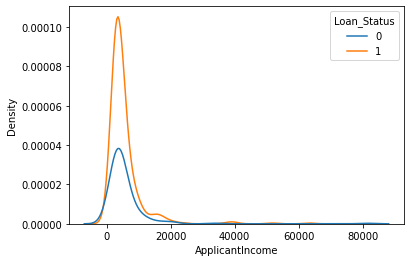

In [49]:
sns.kdeplot('ApplicantIncome',hue='Loan_Status',data=Loan_train)

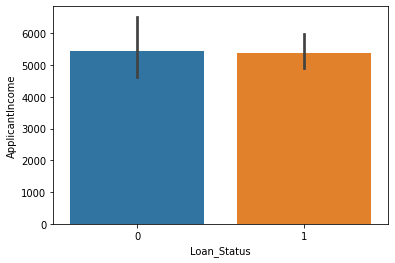

In [50]:
sns.barplot('Loan_Status','ApplicantIncome',data=Loan_train)

### We Would Expect Applicant with Higer Income have more chances for their Loans to be approved
### But as we can see Applicants with Higher Income also have thier Loans Rejected.
### NOthing can be concluded on the relation b/w Loan_Status and ApplicantIncome

##Looking at the aproval rate with Respect to Loan Amount

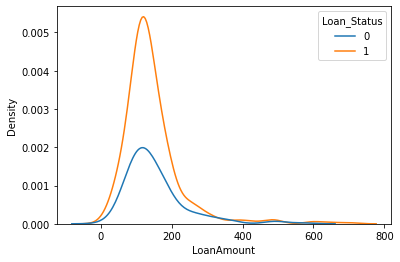

In [51]:
sns.kdeplot('LoanAmount',hue='Loan_Status',data=Loan_train)

### Nothing can be concluded on the relation b/w Loan_Status and Co applicant Income

##Checking for the Outliers.

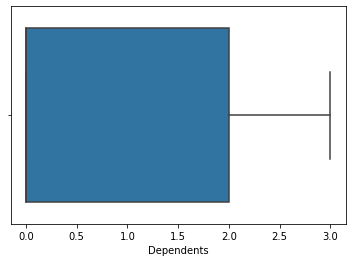

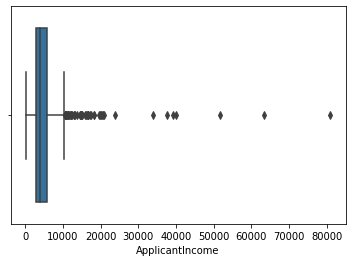

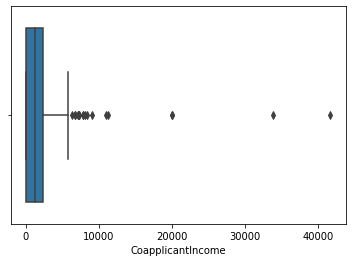

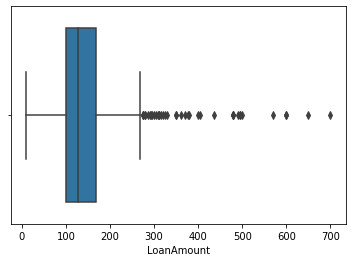

In [52]:
for i in Loan_train[num]:
    x=1
    axes=plt.subplots(x)
    sns.boxplot(Loan_train[i],ax=axes[x])
    x=x+1

###We observe there are Significant Outliers

##Multivariate Analysis

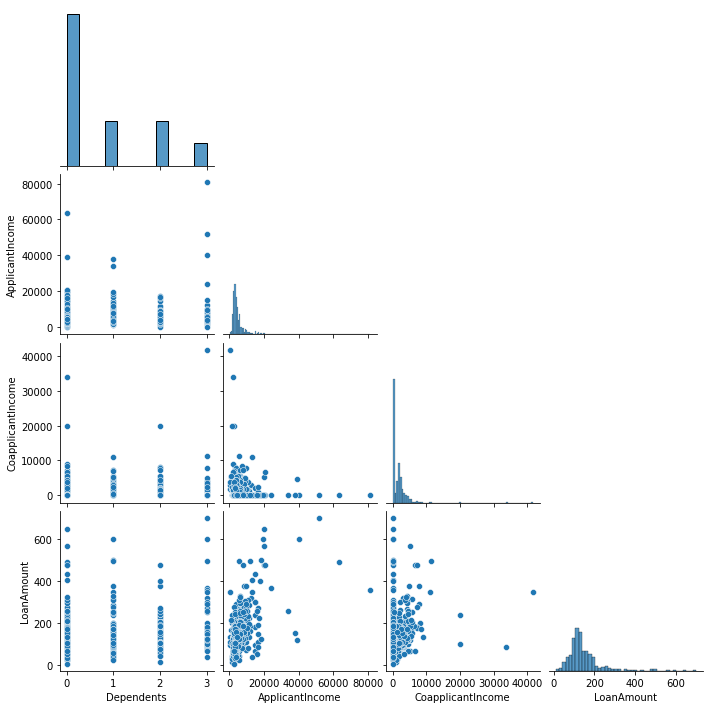

In [53]:
sns.pairplot(Loan_train[num],corner=True)

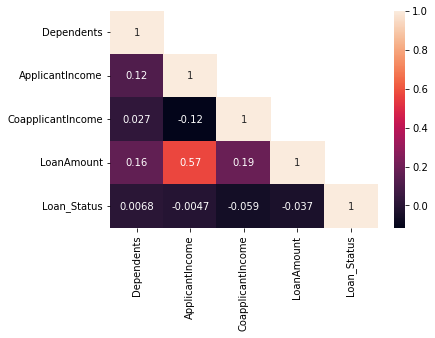

In [54]:
sns.heatmap(Loan_train.corr(),annot=True,mask=np.triu(Loan_train.corr(),+1))

# We observe there is no significan correlation Between the variables 


In [55]:
cat_cols=['Gender','Married','Education','Self_Employed','Loan_Amount_Term','Credit_History','Property_Area']

In [56]:
con_col=num

In [57]:
Loan_train['Gender']=Loan_train['Gender'].fillna(Loan_train['Gender'].mode()[0])
Loan_train['Married']=Loan_train['Married'].fillna(Loan_train['Married'].mode()[0])
Loan_train['Dependents']=Loan_train['Dependents'].fillna(Loan_train['Dependents'].mode()[0])
Loan_train['Self_Employed']=Loan_train['Self_Employed'].fillna(Loan_train['Self_Employed'].mode()[0])
Loan_train['LoanAmount']=Loan_train['LoanAmount'].fillna(Loan_train['LoanAmount'].median())
Loan_train['Loan_Amount_Term']=Loan_train['Loan_Amount_Term'].fillna(Loan_train['Loan_Amount_Term'].median())
Loan_train.loc[(Loan_train.Credit_History.isnull())&(Loan_train.ApplicantIncome>=3859),'Credit_History']=1
Loan_train.loc[(Loan_train.Credit_History.isnull())&(Loan_train.ApplicantIncome<=3859),'Credit_History']=0

##Encoding and Scaling

In [58]:
Loan_train = pd.get_dummies(Loan_train, columns = cat_cols, drop_first = True)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
Loan_train[con_col] = scaler.fit_transform(Loan_train[con_col])
print("The first 5 rows of data are")
Loan_train.head()

The first 5 rows of data are


,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,Gender_Male,Married_Yes,Education_Not Graduate,Self_Employed_Yes,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Credit_History_1.0,Property_Area_Semiurban,Property_Area_Urban
0,-0.737806,0.072991,-0.554487,-0.211241,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
1,0.253470,-0.134412,-0.038732,-0.211241,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0
2,-0.737806,-0.393747,-0.554487,-0.948996,1,1,1,0,1,0,0,0,0,0,0,0,1,0,1,0,1
3,-0.737806,-0.462062,0.251980,-0.306435,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1
4,-0.737806,0.097728,-0.554487,-0.056551,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
